In [22]:
import h5py
import matplotlib.pyplot as plt


player_ids = set()
trumps = [0, 0, 0, 0, 0, 0, 0] # gschobe, diamond, club, heart, spade, bottom-up, top-down
num_rounds = []
num_games = 0

In [23]:
DATASET="./dataset/trump.hdf5"

with h5py.File(DATASET, 'r') as f:
    groups = f.keys()
    num_games = len(groups)
    for group in groups:
        game = f[group]
        player_ids.update([game['player_info'][0][0], game['player_info'][1][0], game['player_info'][2][0], game['player_info'][3][0]])
        i = 0
        for action in game['action']:
            trump = action[0]
            if trump != 0:
                i += 1
            trumps[trump] += 1
        num_rounds.append(i)

Total number of games:  59874
Total number of rounds:  645369
Average number of rounds:  10.778785449443832
Number of players:  4088
Average gschobe:  0.6356549508885614


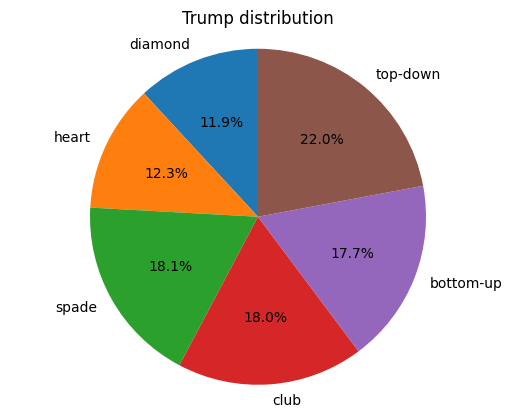

In [26]:

print("Total number of games: ", num_games)
total_rounds = sum(num_rounds)
print("Total number of rounds: ", total_rounds)
avg_rounds = total_rounds / num_games
print("Average number of rounds: ", avg_rounds)
num_players = len(player_ids)
print("Number of players: ", num_players)
avg_gschobe = trumps[0] / total_rounds
print("Average gschobe: ", avg_gschobe)

# make a cake chart
labels = ['diamond', 'heart', 'spade', 'club', 'bottom-up', 'top-down']
sizes = [trumps[1]/total_rounds, trumps[2]/total_rounds, trumps[3]/total_rounds, trumps[4]/total_rounds, trumps[5]/total_rounds, trumps[6]/total_rounds]
# Plot
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')
plt.title("Trump distribution")
plt.show()